In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import pywt

In [2]:
from ts_utils.deconvolution import opt_deconv

In [3]:
def wavelet_lp_filter(symptomatic_incidence, cutoff, wavelet='sym2'):
    dec = [np.asarray(x) for x in pywt.wavedec(symptomatic_incidence, wavelet)]
    print('There are ' + str(len(dec)) + ' levels.')
    for i in range(cutoff, len(dec)):
        dec[i] *= 0

    rec = pywt.waverec(dec, wavelet)
    return rec

In [4]:
# can design advanced wavelet filter to get the desired properties after
def wavelet_filter(symptomatic_incidence, cutoffs, wavelet='sym2'):
    dec = [np.asarray(x) for x in pywt.wavedec(symptomatic_incidence, wavelet)]
    print('There are ' + str(len(dec)) + ' levels.')

    for i, _ in enumerate(dec):
        plt.hist(np.abs(dec[i]))
        plt.show()

        x = np.abs(dec[i])
        dec[i][x < cutoffs[i]] = 0
    rec = pywt.waverec(dec, wavelet)
    return rec

In [5]:
simulation = pd.read_csv('data/seir.csv')

There are 7 levels.


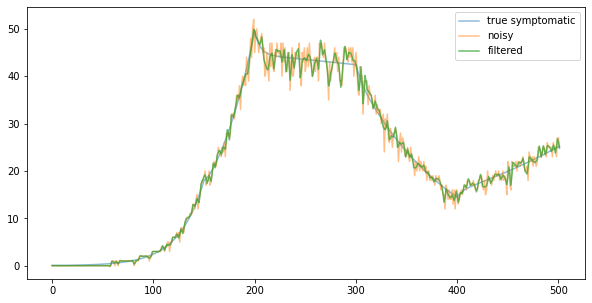

In [6]:
plt.figure(figsize=(10, 5))
simulation = pd.read_csv('data/seir.csv')
filtered = wavelet_lp_filter(simulation['noisy_symptomatic_incidence'], cutoff=6, wavelet='sym3')
simulation['smoothed_symptomatic_incidence'] = filtered[:len(simulation)]
simulation.to_csv('data/seir.csv')

plt.plot(simulation['scaled_symptomatic_incidence'], alpha=0.5, label='true symptomatic')
plt.plot(filtered, alpha=0.5, label='noisy')

plt.plot(filtered, alpha=0.7, label='filtered')
plt.legend()
plt.show()

In [ ]:
length()

for country_name in ['Canada', 'France', 'Italy', 'Japan', 'South Korea', 'United Kingdom', 'United States']:
    country = pd.read_csv('data/'+country_name+'.csv')
    country = country.fillna(method='bfill')
    country = country.fillna(method='ffill')
    symptomatic_incidence = country['new_cases_per_million']
    symptomatic_incidence[symptomatic_incidence<0] = 0
    country['smoothed_symptomatic_incidence'] = symptomatic_incidence
    country.to_csv('data/'+country_name+'.csv')

    plt.figure(figsize=(10, 5))
    plt.plot(symptomatic_incidence, alpha=0.5, label='true symptomatic')
    plt.plot(wavelet_lp_filter(symptomatic_incidence, 4, 'db5'), alpha=0.7, label='filtered')
    plt.title(country_name)
    plt.show()